# Project Title: Used Phone Price Prediction

# Project Description
Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth $52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.
Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.
Data Description

The data contains the different attributes of used/refurbished phones and tablets. The detailed data dictionary is given below.

 # Data Dictionary

- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- new_price: Price of a new device of the same model in euros
- used_price: Price of the used/refurbished device in euros

# Importing Libraries

In [1]:
## loading and preprocessing data
import pandas as pd 
import numpy as np 

## visualization of data
import matplotlib.pyplot as plt 
import seaborn as sns 

## building validation framework 
from sklearn.model_selection import train_test_split 

# categorical encoding 
from sklearn.feature_extraction import DictVectorizer

## regression model 
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor

from xgboost import XGBRegressor


## metrics # to compute the accuracy of the model developed
from sklearn.metrics import root_mean_squared_error


# Loading Dataset

In [2]:
## loading dataset
data = pd.read_csv('dataset/used_device_data.csv')

## create a copy 
df = data.copy()


# Data Preview And Understanding

In [3]:
# view the first rows 
df.head()


,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,111.62,74.26
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.39,174.53
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,359.47,165.85
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,278.93,169.93
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,140.87,80.64


In [4]:
# view the last five rows 
df.tail()


,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,654.50,89.33
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,518.81,154.12
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,92.65,78.05
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,101.92,77.46
3453,Alcatel,Android,12.83,yes,no,13.0,5.0,16.0,2.0,4000.0,168.0,2020,176,72.24,62.31


In [5]:
## check the number of rows and columns 
print(f'Total number of rows: {df.shape[0]}; Total number of columns: {df.shape[1]}')


Total number of rows: 3454; Total number of columns: 15


In [6]:
# A summary description of the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand_name        3454 non-null   object 
 1   os                3454 non-null   object 
 2   screen_size       3454 non-null   float64
 3   4g                3454 non-null   object 
 4   5g                3454 non-null   object 
 5   main_camera_mp    3275 non-null   float64
 6   selfie_camera_mp  3452 non-null   float64
 7   int_memory        3450 non-null   float64
 8   ram               3450 non-null   float64
 9   battery           3448 non-null   float64
 10  weight            3447 non-null   float64
 11  release_year      3454 non-null   int64  
 12  days_used         3454 non-null   int64  
 13  new_price         3454 non-null   float64
 14  used_price        3454 non-null   float64
dtypes: float64(9), int64(2), object(4)
memory usage: 404.9+ KB


In [7]:
## checking for missing values
df.isnull().sum()


brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
main_camera_mp      179
selfie_camera_mp      2
int_memory            4
ram                   4
battery               6
weight                7
release_year          0
days_used             0
new_price             0
used_price            0
dtype: int64

In [8]:
## checking for duplicated values 
df.duplicated().sum()


np.int64(0)

In [9]:
## checking type on columns
df.dtypes


brand_name           object
os                   object
screen_size         float64
4g                   object
5g                   object
main_camera_mp      float64
selfie_camera_mp    float64
int_memory          float64
ram                 float64
battery             float64
weight              float64
release_year          int64
days_used             int64
new_price           float64
used_price          float64
dtype: object

In [10]:
## lets return the total counts of unique values in each column 
df.nunique()


brand_name            34
os                     4
screen_size          142
4g                     2
5g                     2
main_camera_mp        41
selfie_camera_mp      37
int_memory            15
ram                   12
battery              324
weight               555
release_year           8
days_used            924
new_price           2988
used_price          3094
dtype: int64

In [11]:
# Checking unique values in each column
for each_name in df.columns: 
    print(each_name)
    print(df[each_name].unique())
    

brand_name
['Honor' 'Others' 'HTC' 'Huawei' 'Infinix' 'Lava' 'Lenovo' 'LG' 'Meizu'
 'Micromax' 'Motorola' 'Nokia' 'OnePlus' 'Oppo' 'Realme' 'Samsung' 'Vivo'
 'Xiaomi' 'ZTE' 'Apple' 'Asus' 'Coolpad' 'Acer' 'Alcatel' 'BlackBerry'
 'Celkon' 'Gionee' 'Google' 'Karbonn' 'Microsoft' 'Panasonic' 'Sony'
 'Spice' 'XOLO']
os
['Android' 'Others' 'iOS' 'Windows']
screen_size
[14.5  17.3  16.69 25.5  15.32 16.23 13.84 15.77 15.47 15.9  16.74 25.43
 20.32 15.29 12.88 15.24 15.37 16.71 25.6  15.34 16.59 16.81 20.42 10.16
 17.78 17.32 15.39 12.7  15.44  5.28 15.27 15.8  15.72 12.83  7.62  7.75
 10.03 15.42 16.56  5.18 16.64 16.94 16.33 10.29 16.43 12.93 16.36 16.66
 16.21 17.5  16.13 16.28 14.4  15.21 20.12 16.89 16.48 16.31 25.53 12.73
 20.55 30.71 27.94 25.45 18.01 14.35 16.15 23.04 10.34 10.24 12.78 12.75
 23.01 11.81 11.84 10.36 11.76 12.9  17.4  14.55 12.8   7.65 10.21  5.08
  5.13  5.23 20.35 12.57 18.08 17.65 14.83 15.06 13.08 15.14 30.56 19.96
 19.94 25.4  11.89 15.62 17.83  7.85  7.67 16.08 1

# Data preprocessing 
- normalizing column types
    - brand_name, os, 4g, and 5g
- replacing unsual characters with NaN values
- Filling of missing 


In [12]:
# changing object type columns to category 
df['brand_name'] = df['brand_name'].astype('category')

df['os'] = df['os'].astype('category') 

df['4g'] = df['4g'].astype('category')

df['5g'] = df['5g'].astype('category')


In [13]:
# rechecking column types 
df.dtypes 


brand_name          category
os                  category
screen_size          float64
4g                  category
5g                  category
main_camera_mp       float64
selfie_camera_mp     float64
int_memory           float64
ram                  float64
battery              float64
weight               float64
release_year           int64
days_used              int64
new_price            float64
used_price           float64
dtype: object

In [14]:
# replace empty cells in main_camera_mp column 
df['main_camera_mp'] = df['main_camera_mp'].fillna(0)

# replace empty cells in ram column 
df['ram'] = df['ram'].fillna(0)

# replace empty cells in int_memory column 
df['int_memory'] = df['int_memory'].fillna(0)

# replace empty cells in battery  column 
df['battery'] = df['battery'].fillna(0)

# replace empty cells in weight  column 
df['weight'] = df['weight'].fillna(0)


In [15]:
# fill in the missing values in main_camera_mp column with mean

df['main_camera_mp'] = pd.to_numeric(df['main_camera_mp'], errors='coerce')
mean_value = df['main_camera_mp'].mean()  
df['main_camera_mp'] = df['main_camera_mp'].fillna(mean_value)

# fill in the missing values in ram column with mean
df['ram'] = pd.to_numeric(df['ram'], errors='coerce')
mean_value = df['ram'].mean()  
df['ram'] = df['ram'].fillna(mean_value)

# fill in the missing values in selfie_camera_mp column with mean
df['selfie_camera_mp'] = df['selfie_camera_mp'].fillna(df['ram'].mean())

# fill in the missing values in int_memory column with mean
df['int_memory'] = df['int_memory'].fillna(df['int_memory'].mean())

# fill in the missing values in battery column with mean
df['battery'] = df['battery'].fillna(df['battery'].mean())

# fill in the missing values in weight column with mean
df['weight'] = df['weight'].fillna(df['weight'].mean())


In [16]:
# rechecking for missing values in the columns 
df.isnull().sum()


brand_name          0
os                  0
screen_size         0
4g                  0
5g                  0
main_camera_mp      0
selfie_camera_mp    0
int_memory          0
ram                 0
battery             0
weight              0
release_year        0
days_used           0
new_price           0
used_price          0
dtype: int64

# Descriptive Analysis

In [17]:
# Generating statistical summary of the numberic columns 
df.describe().round()


,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
count,3454.0,3454.0,3454.0,3454.0,3454.0,3454.0,3454.0,3454.0,3454.0,3454.0,3454.0
mean,14.0,9.0,7.0,55.0,4.0,3128.0,182.0,2016.0,675.0,237.0,92.0
std,4.0,5.0,7.0,85.0,1.0,1305.0,89.0,2.0,249.0,194.0,55.0
min,5.0,0.0,0.0,0.0,0.0,0.0,0.0,2013.0,91.0,18.0,5.0
25%,13.0,5.0,2.0,16.0,4.0,2100.0,142.0,2014.0,534.0,120.0,56.0
50%,13.0,8.0,5.0,32.0,4.0,3000.0,160.0,2016.0,690.0,190.0,82.0
75%,15.0,13.0,8.0,64.0,4.0,4000.0,185.0,2018.0,869.0,291.0,116.0
max,31.0,48.0,32.0,1024.0,12.0,9720.0,855.0,2020.0,1094.0,2560.0,750.0


# Correletation analysis 

In [18]:
# Correlation results of the target column against other numeric columns
numerical_cols = df.select_dtypes(include=['int', 'float'])

corr_matrix = numerical_cols.corr()

corr_matrix['used_price'].sort_values(ascending=False)


used_price          1.000000
new_price           0.809335
selfie_camera_mp    0.613462
battery             0.546581
ram                 0.530508
screen_size         0.529275
release_year        0.494910
int_memory          0.378855
weight              0.359118
main_camera_mp      0.314111
days_used          -0.385777
Name: used_price, dtype: float64

# Exploratory Data Analysis
- Target variable analysis
- Plot a correlation againts the target variable
- Outlier analysis


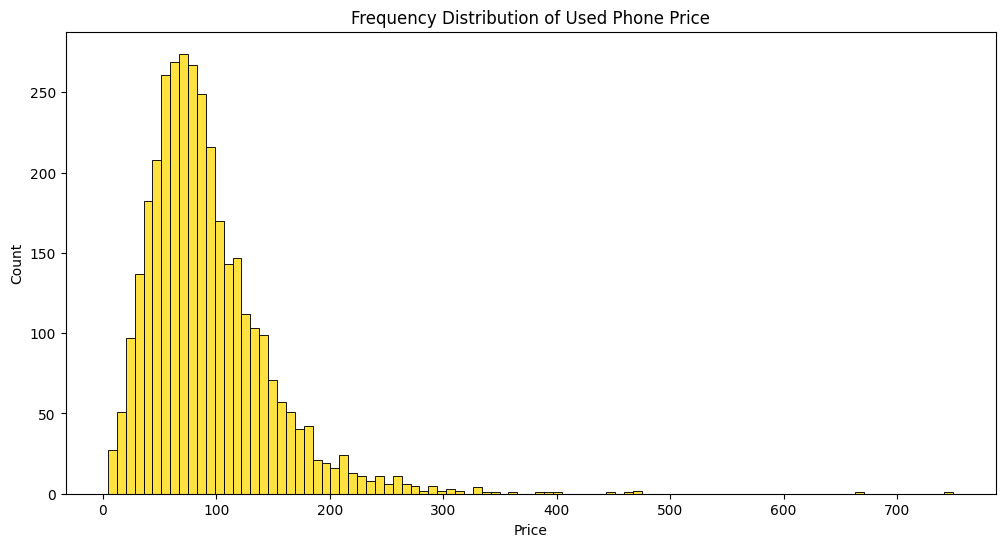

In [19]:
# Plotting a frequency distribution of the target variable 
plt.figure(figsize=(12, 6))

plt.title('Frequency Distribution of Used Phone Price')
plt.xlabel('Price')
plt.ylabel('Count') 

sns.histplot(df['used_price'][df['used_price'] < 100000], color='gold') 

plt.show()


In [20]:
# log transformation 
# Normalising the skewed data
log_price = np.log1p(df['used_price'])


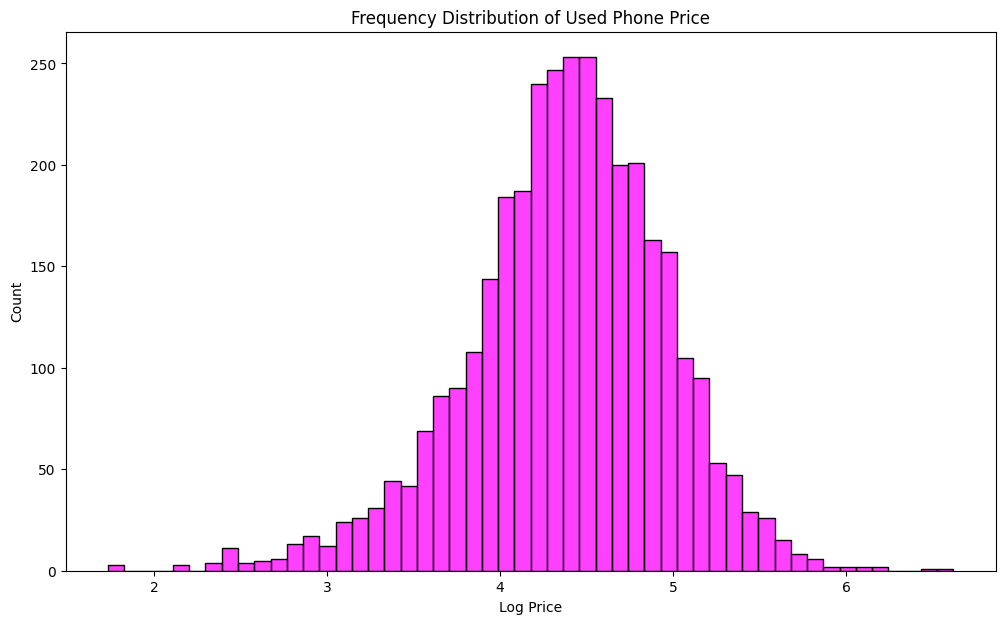

In [21]:
# Plotting a frequency distribution of the target variable 
plt.figure(figsize=(12, 7))

plt.title('Frequency Distribution of Used Phone Price')
plt.xlabel('Log Price')
plt.ylabel('Count') 

sns.histplot(log_price, color='magenta') 

plt.show()

# Building a validation framework¶
- Training dataset 60%
- Validation dataset 20%
- Testing dataset 20%

In [22]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=10)
df_train, df_valid = train_test_split(df_train_full, test_size=0.25, random_state=10)

print(f'Size of Training Dataset: {len(df_train)}')
print(f'Size of Validation Dataset: {len(df_valid)}')
print(f'Size of Testing Dataset: {len(df_test)}')
# print(f'Size of Training Dataset: {}')



Size of Training Dataset: 2072
Size of Validation Dataset: 691
Size of Testing Dataset: 691


In [23]:
## selecting target variable from the dataframe 
y_train = df_train['used_price']
y_valid = df_valid['used_price']



In [24]:
## deleting the target variable from the dataframe
del df_train['used_price']
del df_valid['used_price']


In [25]:
# checking if the target variable is deleted from the dataset 
df_train.head()


,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price
544,Alcatel,Android,10.29,no,no,8.0,0.3,16.0,4.0,1700.0,110.0,2014,571,160.08
797,Asus,Android,10.29,yes,no,5.0,2.0,32.0,4.0,2060.0,150.0,2014,635,301.02
1544,Lenovo,Android,25.43,yes,no,13.0,5.0,64.0,4.0,3150.0,666.8,2015,1038,377.46
1188,HTC,Android,12.75,yes,no,20.2,13.0,32.0,4.0,2700.0,161.0,2015,574,299.27
2371,Samsung,Android,25.53,yes,no,13.0,8.0,128.0,4.0,7040.0,400.0,2019,252,419.00


# Data Preprocessing 2

In [26]:
# Converting dataframe to a vector 
# And normalising the target variable 

y_train = np.log1p(y_train).values 
y_valid = np.log1p(y_valid).values 


In [27]:
#Select columns with int, float and categorial data 
df_train_bl = df_train.select_dtypes(include=['int64', 'float64', 'category'])
df_valid_bl = df_valid.select_dtypes(include=['int64', 'float64', 'category'])


In [28]:
# convert the dataframe to a dictionary format
dict_train_bl = df_train_bl.to_dict(orient='records')
dict_valid_bl = df_valid_bl.to_dict(orient='records') 

# create an instance of dv
dv = DictVectorizer(sparse=False)

dv.fit(dict_train_bl)

DictVectorizer(sparse=False)

In [29]:
# transformation 
X_train_bl = dv.transform(dict_train_bl)
X_valid_bl = dv.transform(dict_valid_bl)


# Training a Baseline Algorithms
- Logistic Regression
- Decision Tree Regressor
- Random Forest Regressor
- Adaboost Regression
- GradientBoosting
- Xgboost
- Bagging Regressor

# Linear Regression Model

In [30]:
## creating an instance of a regression 
lr_model = LinearRegression() 

## fit the data to model 
lr_model.fit(X_train_bl, y_train)


LinearRegression()

# Model Evaluation

In [31]:
## generate validation predictions on the validation set  
y_valid_pred = lr_model.predict(X_valid_bl)


In [32]:
## measure the accuracy 
lr_rmse_bl = root_mean_squared_error(y_valid, y_valid_pred) 

print(f'Baseline Validation Metric: {lr_rmse_bl}')  

print(f'Baseline Validation Metric: {round(lr_rmse_bl, 2) * 100} %')    # Specify to round it to two decimal places 


Baseline Validation Metric: 0.2596858643612942
Baseline Validation Metric: 26.0 %


In [51]:
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,111.62,74.26
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.39,174.53
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,359.47,165.85
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,278.93,169.93
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,140.87,80.64


# Feature Engineering 1


In [70]:
# create a new list of the column names 
cat_feat1 = ['brand_name', 'os', '5g', '4g']
numerical_cols = ['new_price', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'release_year', 'days_used']

# df_train[cat_feat1]   this adds 2 more features to the columns. the more data, the more the model learns

df_train_feat1 = df_train[numerical_cols + cat_feat1]
df_valid_feat1 = df_valid[numerical_cols + cat_feat1]

df_train_feat1 

,new_price,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,release_year,days_used,brand_name,os,5g,4g
544,160.08,10.29,8.00,0.3,16.0,4.0,1700.0,2014,571,Alcatel,Android,no,no
797,301.02,10.29,5.00,2.0,32.0,4.0,2060.0,2014,635,Asus,Android,no,yes
1544,377.46,25.43,13.00,5.0,64.0,4.0,3150.0,2015,1038,Lenovo,Android,no,yes
1188,299.27,12.75,20.20,13.0,32.0,4.0,2700.0,2015,574,HTC,Android,no,yes
2371,419.00,25.53,13.00,8.0,128.0,4.0,7040.0,2019,252,Samsung,Android,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1782,89.90,7.67,3.15,1.3,16.0,4.0,1540.0,2013,1054,LG,Android,no,no
106,60.03,10.16,2.00,0.3,16.0,4.0,2000.0,2013,733,Micromax,Android,no,no
1541,319.75,12.83,13.00,5.0,16.0,4.0,3300.0,2015,749,Lenovo,Android,no,yes
2837,429.76,15.95,13.00,24.0,128.0,4.0,3425.0,2018,537,Vivo,Android,no,yes


In [71]:
# convert our data frame to a dictionary
dict_train_feat1 = df_train_feat1.to_dict(orient='records')
dict_valid_feat1 = df_valid_feat1.to_dict(orient='records') 

# create an instance of dv
dv = DictVectorizer(sparse=False)

dv.fit(dict_train_feat1)

X_train_feat1 = dv.transform(dict_train_feat1)
X_valid_feat1 = dv.transform(dict_valid_feat1)

# Train Feature Model 1

In [72]:
lr_feat1_model = LinearRegression()

lr_feat1_model.fit(X_train_feat1, y_train)

y_valid_pred_feat1 = lr_feat1_model.predict(X_valid_feat1)

rmse_feat1 = root_mean_squared_error(y_valid, y_valid_pred_feat1)
print(f'Log Regression Validation Metric for Feat1: {round(rmse_feat1, 2) * 100} %')


Log Regression Validation Metric for Feat1: 26.0 %


# Decision Tree Regressor

In [33]:
# create an instance 
dt_model_bl = DecisionTreeRegressor(random_state=11)

dt_model_bl.fit(X_train_bl, y_train)


DecisionTreeRegressor(random_state=11)

In [34]:
# generate validation prediction 
y_valid_pred = dt_model_bl.predict(X_valid_bl)

# Chekcing for accuracy 
dt_rmse_bl = root_mean_squared_error(y_valid, y_valid_pred) 
print(f'Decision Tress Baseline Validation Metric: {round(dt_rmse_bl, 2) * 100} %')

Decision Tress Baseline Validation Metric: 31.0 %


# Random Forest Regressor

In [35]:
# create an instance 
rf_model_bl = RandomForestRegressor (random_state=11)

rf_model_bl.fit(X_train_bl, y_train)

# generate validation prediction 
y_valid_pred = rf_model_bl.predict(X_valid_bl)

# 
rf_rmse_bl = root_mean_squared_error(y_valid, y_valid_pred) 
print(f'Random Forest Baseline Validation Metric: {round(rf_rmse_bl, 2) * 100} %')


Random Forest Baseline Validation Metric: 22.0 %


# Adaboost Regressor

In [36]:
# create an instance 
ar_model_bl = AdaBoostRegressor(random_state=11)

ar_model_bl.fit(X_train_bl, y_train)

# generate validation prediction 
y_valid_pred = ar_model_bl.predict(X_valid_bl)

# 
ar_rmse_bl = root_mean_squared_error(y_valid, y_valid_pred) 
print(f'AdaBoost Baseline Validation Metric: {round(ar_rmse_bl, 2) * 100} %')


AdaBoost Baseline Validation Metric: 25.0 %


# Bagging Regressor

In [37]:
# create an instance 
br_model_bl = BaggingRegressor(random_state=11)

br_model_bl.fit(X_train_bl, y_train)

# generate validation prediction 
y_valid_pred = br_model_bl.predict(X_valid_bl)

# 
br_rmse_bl = root_mean_squared_error(y_valid, y_valid_pred) 
print(f'Bagging Regressor Baseline Validation Metric: {round(br_rmse_bl, 2) * 100} %')


Bagging Regressor Baseline Validation Metric: 23.0 %


# Gradient Boosting Regressor

In [38]:
# create an instance 
gb_model_bl = GradientBoostingRegressor(random_state=11)

gb_model_bl.fit(X_train_bl, y_train)

# generate validation prediction 
y_valid_pred = gb_model_bl.predict(X_valid_bl)

# 
gb_rmse_bl = root_mean_squared_error(y_valid, y_valid_pred) 
print(f'Gradient Boosting Baseline Validation Metric: {round(gb_rmse_bl, 2) * 100} %')


Gradient Boosting Baseline Validation Metric: 22.0 %


# XGBoost

In [39]:
# create an instance 
xgb_model_bl = XGBRegressor(random_state=11)

xgb_model_bl.fit(X_train_bl, y_train)

# generate validation prediction 
y_valid_pred = xgb_model_bl.predict(X_valid_bl)

# 
xgb_rmse_bl = root_mean_squared_error(y_valid, y_valid_pred) 
print(f'XGBoost Regressor Baseline Validation Metric: {round(xgb_rmse_bl, 2) * 100} %')


XGBoost Regressor Baseline Validation Metric: 24.0 %


In [40]:
df['ram'].value_counts()

ram
4.00     2815
6.00      154
8.00      130
2.00       90
0.25       83
3.00       81
1.00       34
12.00      18
0.02       18
0.03       17
0.50        9
0.00        4
1.50        1
Name: count, dtype: int64

In [41]:
df['ram'].nunique()

13

# Training and Testing Final Model

In [78]:
# Get numeric and categorical columns
numeric_and_categorical = df_train_full.select_dtypes(include=['int64', 'float64', 'category'])

# Exclude unwanted columns ('4g' and '5g')
excluded_columns = ['4g', '5g']
df_train_fm = numeric_and_categorical.drop(columns=excluded_columns, errors='ignore')

df_test_fm = df_test.select_dtypes(include=['int64', 'float64', 'category'])

#Normalise and transform to a vector
y_train_fm = np.log1p(df_train_full['used_price']).values 
y_test_fm = np.log1p(df_test['used_price']).values 

# del
del df_train_fm['used_price']
del df_test_fm['used_price']

# convert the dataframe to a dictionary format
dict_train_fm = df_train_fm.to_dict(orient='records')
dict_test_fm = df_test_fm.to_dict(orient='records') 

# training a dictVector
dv = DictVectorizer(sparse=False)
dv.fit(dict_train_fm)

# transform to matrix format
X_train_fm = dv.transform(dict_train_fm)
X_test_fm = dv.transform(dict_test_fm)

## creating an instance of a regression 
rf_model_fm = RandomForestRegressor(random_state=11)

## training the model
rf_model_fm.fit(X_train_fm, y_train_fm)

## generate validation predictions on the validation set  
y_test_pred_fm = rf_model_fm.predict(X_test_fm)

## measure the accuracy 
rf_rmse_fm = root_mean_squared_error(y_test_fm, y_test_pred_fm) 

print(f'Random Forest Model Final Test Metric: {round(rf_rmse_fm, 2) * 100} %')    # Specify to round it to two decimal places 


Random Forest Model Final Test Metric: 21.0 %


In [79]:
df_train_full

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
1977,Motorola,Android,12.88,yes,no,12.0,8.0,64.0,4.0,3000.0,167.0,2018,561,180.92,89.36
2657,Others,Android,12.83,yes,no,16.0,20.0,64.0,4.0,3020.0,140.0,2018,666,249.23,148.70
1462,Lava,Android,12.83,no,no,8.0,2.0,16.0,4.0,2000.0,177.0,2014,566,150.18,47.64
3325,Xiaomi,Android,15.21,yes,no,12.0,5.0,32.0,3.0,4000.0,180.0,2018,478,120.36,84.40
628,Others,Android,10.34,no,no,8.0,2.0,16.0,4.0,1800.0,124.9,2013,601,229.72,36.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3441,Samsung,Android,15.32,yes,no,12.0,10.0,256.0,8.0,3500.0,168.0,2019,429,518.50,182.19
1344,Huawei,Android,12.83,yes,no,13.0,5.0,32.0,4.0,3000.0,167.0,2015,975,200.95,98.31
527,Alcatel,Android,15.24,yes,no,13.1,5.0,16.0,4.0,3100.0,175.0,2014,654,458.49,93.34
3197,Honor,Android,16.74,yes,no,13.0,16.0,64.0,4.0,4000.0,196.8,2019,201,146.83,126.18


In [43]:
df_train_full.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['brand_name', 'os', 'screen_size', '4g', '5g', 'main_camera_mp',
       'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight',
       'release_year', 'days_used', 'new_price', 'used_price'],
      dtype='object')>

# Save the Model

In [44]:
import pickle 
with open('used_phone_Price_Prediction.bin', 'wb') as f_out: 
    pickle.dump((dv, rf_model_fm), f_out) 


# Loading the mode

In [45]:
with open('used_phone_Price_Prediction.bin', 'rb') as f_in:
    dv.model = pickle.load(f_in)
    

# Making Predictions

In [46]:
device_data = {
 'brand_name': 'Itel',
 'os': 'Android',
 'screen_size': 15.23,
 '4g': 'yes',
 '5g': 'no',
 'main_camera_mp': 18.00,
 'selfie_camera_mp': 16.0,
 'int_memory': 64.0,
 'ram': 16.4,
 'battery': 4500.0,
 'weight': 180.0,
 'release_year': 2023,
 'days_used': 365,
 'new_price': 2000.0,
 # 'used_price': 200.21,
}

In [47]:
## lets create a function to make a single prediction 
def predict_single(df, dv, rf_model_fm):
    X = dv.transform([device_data])
    y_pred = rf_model_fm.predict(X)[0]
    return y_pred

## lets call the function to make the prediction 
prediction = predict_single(device_data, dv, rf_model_fm)

## output the value of the prediction 
print(f'The price of the used device is ${prediction.round(2)}')


The price of the used device is $5.49


In [48]:
# # import numpy as np

# # Get feature importances
# feature_importances = rf_model_fm.feature_importances_

# # Map feature importances to their corresponding feature names
# feature_importance_dict = dict(zip(dv.get_feature_names_out(), feature_importances))

# # Sort and display important features
# sorted_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
# print(sorted_importances[:15])  # Top 10 important features

# # Focus on the features contributing most to the model and consider retraining the model if needed.

In [49]:

# feature_names = dv.get_feature_names_out()
# print("Features used by the model:")
# print(feature_names)


In [50]:
print("Train columns:", df_train_fm.columns.tolist())

# print("Test columns:", df_test_fm.columns.tolist())


Train columns: ['brand_name', 'os', 'screen_size', '4g', '5g', 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight', 'release_year', 'days_used', 'new_price']
